In [2]:
# string method demo 
# translated code from matlab to python
# original code is here: http://www.cims.nyu.edu/~eve2/string.htm

In [3]:
### zero-temperature string method demo ###

In [4]:
# python 2.7.10

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from __future__ import print_function, division

In [7]:
from matplotlib.colors import LogNorm

In [8]:
nstepmax = 2000 # max iteration

In [9]:
nstepplot = 10 # plot freq

In [10]:
flag1 = 1 # plot stringevery nstepplot if 1

In [11]:
tol1 = 1e-7 # stop iteration criterion

In [12]:
n1 = 25 # # of images along the string

In [13]:
h = 1e-4 # time-step

In [14]:
# define the initial position of string end point
xa = -1; ya = 0.5
xb = 0.7; yb = 0.5

In [15]:
# initialization

In [16]:
g1 = np.linspace(0, 1, n1)

In [17]:
x = (xb - xa) * g1 + xa

In [18]:
y = (x - xa) * (yb - ya) / (xb - xa) + ya

(0, 1)

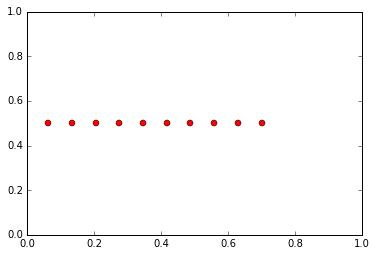

In [19]:
plt.plot(x, y, 'ro')
plt.xlim(0, 1)
plt.ylim(0, 1)

In [20]:
dx = x - np.roll(x, 1)

In [21]:
dy = y - np.roll(y, 1)

In [22]:
dx[0] = 0; dy[0] = 0

In [23]:
lxy = np.cumsum(np.sqrt(dx**2 + dy**2))

In [24]:
lxy /= lxy[-1]

In [25]:
x = np.interp(g1, lxy, x)

In [26]:
y = np.interp(g1, lxy, y)

In [27]:
xi = x; yi = y

(0, 1)

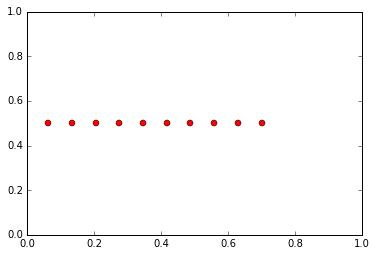

In [28]:
plt.plot(x, y, 'ro')
plt.xlim(0, 1)
plt.ylim(0, 1)

In [29]:
# parameters in Mueller potential

In [30]:
aa = np.array([-1, -1, -6.5, 0.7])

In [31]:
bb = np.array([0, 0, 11, 0.6])

In [32]:
cc = np.array([-10, -10, -6.5, 0.7])

In [33]:
AA = np.array([-200, -100, -170, 15])

In [34]:
XX = np.array([1, 0, -0.5, -1])

In [35]:
YY = np.array([0, 0.5, 1.5, 1])

In [36]:
xx, yy = np.meshgrid(np.arange(-1.5, 1.2, 0.01), np.arange(-0.2, 2, 0.01))

In [37]:
# make potential landscape

In [38]:
V1 = 0

In [39]:
for i in xrange(len(aa)):
    val = AA[i] * np.exp( aa[i] * (xx - XX[i])**2 + bb[i] * (xx - XX[i]) * (yy - YY[i]) + cc[i] * (yy - YY[i])**2 )
    print(val)
    V1 += val

[[ -2.58804421e-01  -2.72046402e-01  -2.85908733e-01 ...,  -1.30245010e+02
   -1.29789949e+02  -1.29310613e+02]
 [ -2.69097198e-01  -2.82865818e-01  -2.97279462e-01 ...,  -1.35424917e+02
   -1.34951758e+02  -1.34453359e+02]
 [ -2.79240284e-01  -2.93527886e-01  -3.08484823e-01 ...,  -1.40529491e+02
   -1.40038497e+02  -1.39521312e+02]
 ..., 
 [ -5.39703129e-18  -5.67317565e-18  -5.96225664e-18 ...,  -2.71609113e-15
   -2.70660143e-15  -2.69660550e-15]
 [ -3.63587225e-18  -3.82190520e-18  -4.01665329e-18 ...,  -1.82977638e-15
   -1.82338335e-15  -1.81664930e-15]
 [ -2.44452063e-18  -2.56959691e-18  -2.70053267e-18 ...,  -1.23022092e-15
   -1.22592267e-15  -1.22139514e-15]]
[[ -7.84864081e-02  -8.08685878e-02  -8.33064073e-02 ...,  -1.89431118e-01
   -1.85031386e-01  -1.80697699e-01]
 [ -9.01906231e-02  -9.29280432e-02  -9.57294004e-02 ...,  -2.17679863e-01
   -2.12624025e-01  -2.07644081e-01]
 [ -1.03433145e-01  -1.06572496e-01  -1.09785171e-01 ...,  -2.49641394e-01
   -2.43843217e-01  -

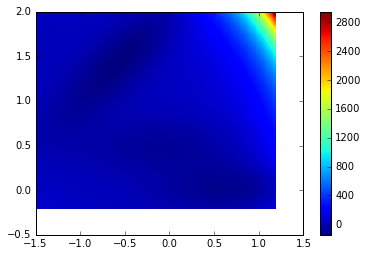

In [40]:
# plot
plt.pcolormesh(xx, yy, V1)
plt.colorbar()

In [41]:
V1_mod = V1 + 200 # translation to avoid the negative region for Log plot

In [42]:
V1_mod.max()

3340.8517863088259

In [43]:
V1_mod.min()

53.301743389480265

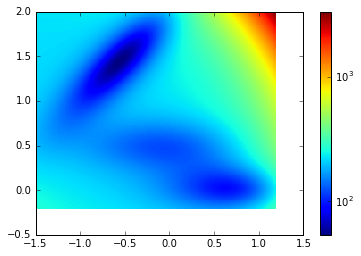

In [44]:
# log plot
plt.pcolor(xx, yy, V1_mod, norm = LogNorm(vmin = V1_mod.min(), vmax = V1_mod.max()))
plt.colorbar()
plt.savefig("./landscape.png")

In [45]:
# plot with contour+color

In [46]:
interval = np.arange(50, 200, 10)

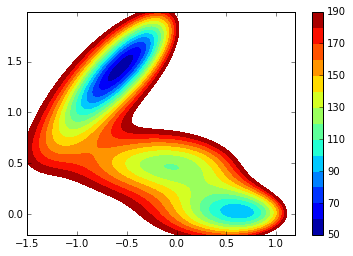

In [47]:
plt.contourf(xx, yy, V1_mod, interval)
plt.colorbar()
plt.savefig("./landscape2.png")

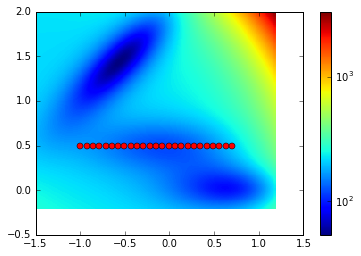

In [48]:
# plot with initial string + energy landscape
plt.pcolor(xx, yy, V1_mod, norm = LogNorm(vmin = V1_mod.min(), vmax = V1_mod.max()))
plt.colorbar()
plt.plot(xi, yi, 'ro')
plt.savefig("./before_string.png")

In [49]:
# some functions for main loop

In [50]:
def calc_gradient(x, y):
    dVx = 0
    dVy = 0
    for i in xrange(len(aa)):
        ee = AA[i] * np.exp( aa[i] * (x - XX[i])**2 + bb[i] * (x - XX[i]) * (y - YY[i]) + cc[i] * (y - YY[i])**2 )
        dVx += (2 * aa[i] * (x - XX[i]) + bb[i] * (y - YY[i])) * ee
        dVy += (bb[i] * (x - XX[i]) + 2 * cc[i] * (y - YY[i])) * ee
    return (dVx, dVy)

In [51]:
# to plot the string locus...

In [52]:
fig = plt.Figure()

In [53]:
ax1 = fig.add_subplot(111)

In [54]:
ax1.pcolor(xx, yy, V1_mod, norm = LogNorm(vmin = V1_mod.min(), vmax = V1_mod.max()))

In [55]:
ax1.plot(x, y, 'ro')

In [56]:
# main loop

In [57]:
for i in xrange(nstepmax):
    dVx, dVy = calc_gradient(x, y)
    x0 = x; y0 = y
    
    x -=  h * dVx
    y -=  h * dVy
    
    dx = x - np.roll(x, 1)
    dy = y - np.roll(y, 1)
    dx[0] = 0; dy[0] = 0
    lxy = np.cumsum(np.sqrt(dx**2 + dy**2))
    lxy /= lxy[-1]
    
    x = np.interp(g1, lxy, x)
    y = np.interp(g1, lxy, y)
    
    ax1.plot(x, y, 'ro')
    
    tol = (np.linalg.norm(x - x0) + np.linalg.norm(y - y0)) / n1
    
    if tol < tol1:
        break

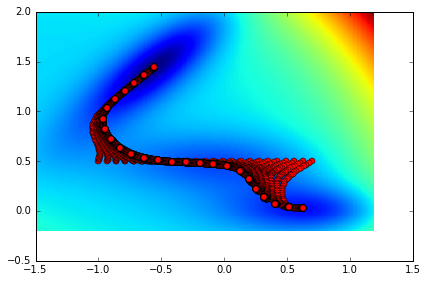

In [60]:
# locus of the string
fig.tight_layout()
fig

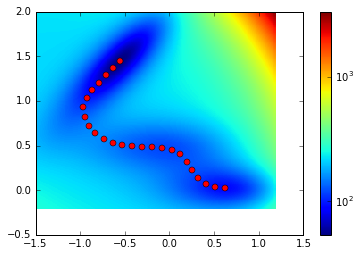

In [61]:
# final state of string
plt.pcolor(xx, yy, V1_mod, norm = LogNorm(vmin = V1_mod.min(), vmax = V1_mod.max()))
plt.colorbar()
plt.plot(x, y, 'ro')
plt.savefig("./after_string.png")